<a href="https://colab.research.google.com/github/YusukeAoki57/diveintocode-ml/blob/master/Week2%E6%8E%88%E6%A5%AD%E5%89%8D%E8%AA%B2%E9%A1%8C_%E6%95%B0%E5%AD%A64.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

問題1ダーツの的を選ぶ

In [ ]:
import numpy as np

In [ ]:
def dice_random():
  dice = list(range(1, 7))
  random_choice=np.random.choice(dice)
  return random_choice


問題2 ダーツを投げて、刺さった場所を記録する

In [ ]:
def record():
  mean=dice_random()
  cov=0.1
  #mean2=([mean,0])
  #cov2=([[0.1,1],
  #   [1,0.1]])
  #Multi_normal_dis=np.random.multivariate_normal(mean2,cov2,num)
  x=np.random.normal(mean,cov,1)
  y=np.random.normal(0,cov,1)
  #a=0
  #x=Multi_normal_dis[:,a]
  #b=1
  #=Multi_normal_dis[:,b]
  #一つの配列にする
  z=[]
  z.append(x[0])
  z.append(y[0])
  return (z,mean)

問題3 ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する

In [ ]:
def dic_record(num=1000):
  #num=1000
  z2=[]
  dice_num=[1,2,3,4,5,6]
  dice = list(range(1, 7))
  dic={}
  for i in range(num):
    #上記関数を呼び出し
    z2,choice=record()
    #辞書に記録
    if choice==dice_num[0]:
      key=dice_num[0]
      if key not in dic:
        dic[key]=[]
      dic[key].append(z2)
    elif choice==dice_num[1]:
      key=dice_num[1]
      if key not in dic:
        dic[key]=[]
      dic[key].append(z2) 
    elif choice==dice_num[2]:
      key=dice_num[2]
      if key not in dic:
        dic[key]=[]
      dic[key].append(z2) 
    elif choice==dice_num[3]:
      key=dice_num[3]
      if key not in dic:
        dic[key]=[]
      dic[key].append(z2) 
    elif choice==dice_num[4]:
      key=dice_num[4]
      if key not in dic:
        dic[key]=[]
      dic[key].append(z2) 
    elif choice==dice_num[5]:
      key=dice_num[5]
      if key not in dic:
        dic[key]=[]
      dic[key].append(z2) 

  return dic
print(dic_record(3))

{6: [[5.856706008361739, 0.06755497662165995]], 5: [[5.045791962833505, -0.14681401682492687]], 1: [[0.964432533127985, -0.003436133845108609]]}


問題4 ダーツのまとと刺さった位置を描画する

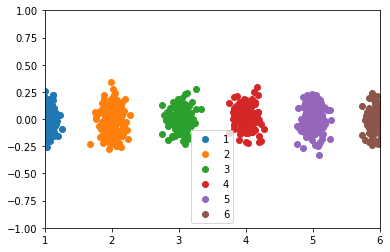

In [ ]:
import numpy as np
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

num=1000

dice1=dic_record(num).get(1)
dice2=dic_record(num).get(2)
dice3=dic_record(num).get(3)
dice4=dic_record(num).get(4)
dice5=dic_record(num).get(5)
dice6=dic_record(num).get(6)
x1=[]
y1=[]
x2=[]
y2=[]
x3=[]
y3=[]
x4=[]
y4=[]
x5=[]
y5=[]
x6=[]
y6=[]
for i in range(len(dice1)):
  x1.append(dice1[i][0])
  y1.append(dice1[i][1])
for i in range(len(dice2)):
  x2.append(dice2[i][0])
  y2.append(dice2[i][1])
for i in range(len(dice3)):
  x3.append(dice3[i][0])
  y3.append(dice3[i][1])
for i in range(len(dice4)):
  x4.append(dice4[i][0])
  y4.append(dice4[i][1])
for i in range(len(dice5)):
  x5.append(dice5[i][0])
  y5.append(dice5[i][1])
for i in range(len(dice6)):
  x6.append(dice6[i][0])
  y6.append(dice6[i][1])


#グラフを描画
plt.xlim(1,6)
plt.ylim(-1,1)
plt.scatter(x1,y1,label="1")
plt.scatter(x2,y2,label="2")
plt.scatter(x3,y3,label="3")
plt.scatter(x4,y4,label="4")
plt.scatter(x5,y5,label="5")
plt.scatter(x6,y6,label="6")
plt.legend()


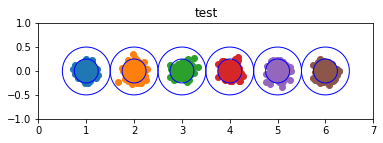

In [ ]:
import numpy as np
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

def wise(v):
    if v == 1:
        return "CCW"
    else:
        return "CW"


def make_circle(r):
    t = np.arange(0, np.pi * 2.0, 0.01)
    t = t.reshape((len(t), 1))
    x = r * np.cos(t)
    y = r * np.sin(t)
    return np.hstack((x, y))

Path = mpath.Path

fig, ax = plt.subplots()

inside_vertices = make_circle(0.25)
outside_vertices = make_circle(0.5)
dice_1 = ax.scatter(x1,y1)
dice_2=ax.scatter(x2,y2)
dice_3=ax.scatter(x3,y3)
dice_3=ax.scatter(x4,y4)
dice_3=ax.scatter(x5,y5)
dice_3=ax.scatter(x6,y6)
codes = np.ones(
    len(inside_vertices), dtype=mpath.Path.code_type) * mpath.Path.LINETO
codes[0] = mpath.Path.MOVETO
for i, (inside, outside) in enumerate(((1, 1), (1, -1), (-1, 1), (-1, -1),(1,1),(1,1))):
    # Concatenate the inside and outside subpaths together, changing their
    # order as needed
    vertices = np.concatenate((outside_vertices[::outside],
                               inside_vertices[::inside]))
    #print(vertices)
    # Shift the path
    vertices[:, 0] += i * 1.0+1
    # The codes will be all "LINETO" commands, except for "MOVETO"s at the
    # beginning of each subpath
    all_codes = np.concatenate((codes, codes))
    #print(all_codes)
    # Create the Path object
    path = mpath.Path(vertices, all_codes)
    # Add plot it
    patch = mpatches.PathPatch(path, facecolor='none', edgecolor='blue')
    ax.add_patch(patch)

    #散布図を描画
    #e = mpatches.Circle((.75,.75),radius=.25,fc='none')
    #ax.add_patch(dice_1)
    #dice_1.set_clip_path(e)


    #ax.annotate("Outside %s,\nInside %s" % (wise(outside), wise(inside)),
            #    (i * 2.5, -1.5), va="top", ha="center")

ax.set_xlim(0, 7)
ax.set_ylim(-1, 1)
ax.set_title('test')
ax.set_aspect(1.0)
plt.show()




問題5 関数化

In [ ]:
#上記問題4の関数化は未実装